<a href="https://colab.research.google.com/github/lauratcc18/IAMINTIC/blob/main/classifier_002_Linea_Base_GPT_Classifie_v2r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import nltk

from tqdm import tqdm


nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus_all_3000 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRK-iTaMXi5romNgBGV1SGwit-84hJEGYTGhR7QpPAiESQCcvvd2PQwGw1lFnfBaQ/pub?output=xlsx"
corpus_all_1000 ='https://docs.google.com/spreadsheets/d/e/2PACX-1vQ0J2ePgRoeaFtsQYieFE0LWw4A8wO6jJWIMnx5sLgO1TLMFHXfEAmvAYdYvrJeIQ/pub?output=xlsx'
df = pd.read_excel(corpus_all_3000)
df

,Texto,Tipo de fuente,Clasificacion
0,El rey de los animales Se reunieron los animal...,Cuentos,Human
1,Domingo 7 Había una vez dos compadres jorobado...,Cuentos,Human
2,Francisco El Hombre En los albores del siglo X...,Cuentos,Human
3,Aminta Peláez- La leyenda de Wareke Hace muchí...,Cuentos,Human
4,EL OASIS DE BELISSAMA ATLAUA pASeABA Con BeLis...,Cuentos,Human
...,...,...,...
3843,la justicia es la base de la democracia y el e...,Tweets,LLM
3844,la violencia y la delincuencia son una amenaza...,Tweets,LLM
3845,la educación es la base d. es importante que s...,Tweets,LLM
3846,la economía es un factor clave para el bienest...,Tweets,LLM


<Axes: xlabel='Tipo de fuente'>

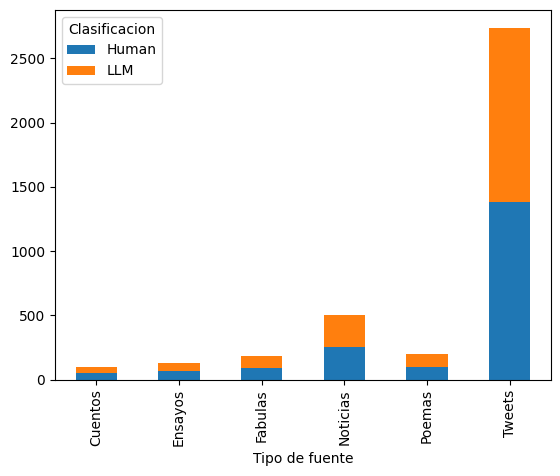

In [ ]:
# @title Texts by source type and classification

df.groupby(['Tipo de fuente', 'Clasificacion']).size().unstack().plot(kind='bar', stacked=True)

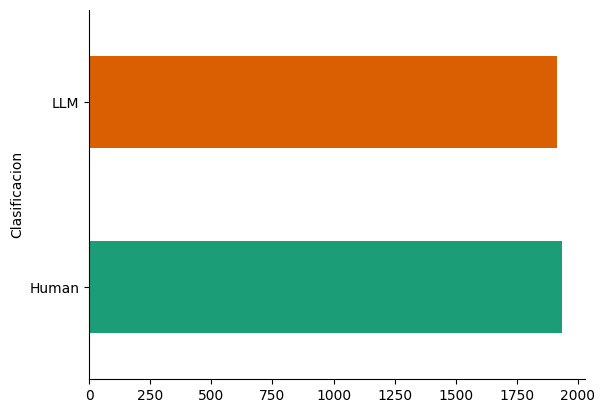

In [ ]:
# @title Clasificacion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Clasificacion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

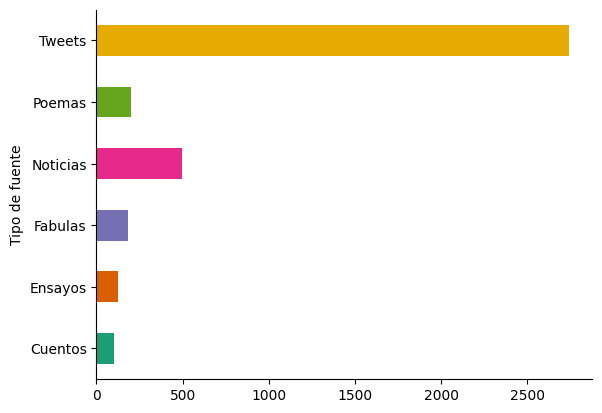

In [ ]:
# @title Tipo de fuente

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tipo de fuente').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Parte 1 - Para Todos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(df['Texto'].values, le.fit_transform(df['Clasificacion'].values), test_size=0.30, random_state=42)

In [ ]:
print(X_train)
print(y_train)
print(list(le.classes_))

['el cuidado del  todos. ¿qué estás haciendo tú para contribuir? #medioambiente '
 'Mil veces me engañó; más de mil veces abrió en mi corazón sangrienta herida; de los celos la copa desabrida me hizo beber hasta agotar las heces.  Fue en mi vida, con todas sus dobleces, la causa de mi angustia -no extinguida- aunque, ¡pobre de mí! toda la vida su mentiroso amor... pagué con creces.  Los tiempos han pasado; ya su boca no me da sus caricias, ni me abrasa el fuego de sus ósculos de loca;  ¡y sin embargo mi pasión persiste... pues, cuando a veces por mi senda pasa, me alejo mudo... y cabizbajo... y triste! '
 'RT @infopresidencia: ğŸ�¥ #EnVivo | #PrevenciÃ³nyAcciÃ³n. Medidas implementadas por el Gobierno Nacional durante la emergencia por el COVID-19.â€¦'
 ...
 'RT @cuestion_p: 8. Rutas de atención feministas: https://t.co/Wgbi3RYZuH'
 'ğŸŒ� el cuidado del medio ambiente es responsabilidad de todos. conoce aquÃ\xad algunas acciones para contribuir a la sostenibilidad: #medioambiente ğŸŒ± '

In [ ]:
from nltk.tokenize import TweetTokenizer;

tokenizer = TweetTokenizer()
def pre_process(text):
  # print('before pre_process', text)
  text = text.lower()
  # print('after pre_process', text)
  return text

def tokenize_stemmer(text):
  tokens_doc = tokenizer.tokenize(text)
  tokens_doc_wo_stop = [w for w in tokens_doc if w.isalpha()]
  tokens_docs_stem = tokens_doc_wo_stop # [stemmer.stem(w) for w in tokens_doc_wo_stop]
  return tokens_docs_stem

In [ ]:
stop_words = nltk.corpus.stopwords.words ('spanish')

In [ ]:
vectorizer = TfidfVectorizer (
  analyzer = 'word',
  lowercase = True,
  preprocessor=pre_process, tokenizer=tokenize_stemmer,
  stop_words= stop_words
)
X_train_vec = vectorizer.fit_transform (X_train)
X_test_vec = vectorizer.transform (X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
len(list(vectorizer.get_feature_names_out()))

28247

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['aaah', 'ab', 'abad', 'abadía', 'abajo', 'abalanzándose',
       'abalanzó', 'abandona', 'abandonaban', 'abandonada', 'abandonado',
       'abandonados', 'abandonan', 'abandonando', 'abandonar',
       'abandonas', 'abandones', 'abandono', 'abandoné', 'abandonó',
       'abaratan', 'abarca', 'abarcar', 'abarcaremos', 'abarcarlo',
       'abarco', 'abarqué', 'abastecimientocomo', 'abate', 'abatido',
       'abatía', 'abdominal', 'abecé', 'abeja', 'abejas', 'abejita',
       'abella', 'abertura', 'abierta', 'abiertamente', 'abiertas',
       'abierto', 'abiertos', 'abisales', 'abismo', 'abismos', 'abocado',
       'abogada', 'abogado', 'abogados', 'abogar', 'abogó', 'abominable',
       'abominables', 'abominados', 'abonan', 'aborda', 'abordaba',
       'abordado', 'abordando', 'abordar', 'abordarlo', 'abordarse',
       'abordarán', 'abordemos', 'aborden', 'abordó', 'aborreciendo',
       'about', 'abra', 'abracadabra', 'abram', 'abran', 'abras',
       'abrasa', 'abrasador', 'ab

In [ ]:
baselines = {}
baselines['lr'] = LogisticRegression ()
baselines['lr'].fit (X_train_vec, y_train)
baselines['lr'].score(X_train_vec, y_train)

0.9242480505012997

In [ ]:
list(vectorizer.get_feature_names_out())[:20]

['aaah',
 'ab',
 'abad',
 'abadía',
 'abajo',
 'abalanzándose',
 'abalanzó',
 'abandona',
 'abandonaban',
 'abandonada',
 'abandonado',
 'abandonados',
 'abandonan',
 'abandonando',
 'abandonar',
 'abandonas',
 'abandones',
 'abandono',
 'abandoné',
 'abandonó']

In [ ]:
y_pred = baselines['lr'].predict (X_test_vec)
print('Test predcit')
print(classification_report(y_test, y_pred, zero_division = 0, digits = 6))

Test predcit
              precision    recall  f1-score   support

           0   0.683264  0.804560  0.738968       614
           1   0.722222  0.576710  0.641316       541

    accuracy                       0.697835      1155
   macro avg   0.702743  0.690635  0.690142      1155
weighted avg   0.701512  0.697835  0.693228      1155



#  Parte 2 - Por tema

In [ ]:
df = pd.read_excel(corpus_all_3000)
df

,Texto,Tipo de fuente,Clasificacion
0,El rey de los animales Se reunieron los animal...,Cuentos,Human
1,Domingo 7 Había una vez dos compadres jorobado...,Cuentos,Human
2,Francisco El Hombre En los albores del siglo X...,Cuentos,Human
3,Aminta Peláez- La leyenda de Wareke Hace muchí...,Cuentos,Human
4,EL OASIS DE BELISSAMA ATLAUA pASeABA Con BeLis...,Cuentos,Human
...,...,...,...
3843,la justicia es la base de la democracia y el e...,Tweets,LLM
3844,la violencia y la delincuencia son una amenaza...,Tweets,LLM
3845,la educación es la base d. es importante que s...,Tweets,LLM
3846,la economía es un factor clave para el bienest...,Tweets,LLM


In [ ]:
list(df['Tipo de fuente'].unique())

['Cuentos', 'Ensayos', 'Fabulas', 'Noticias', 'Poemas', 'Tweets']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_train = {}
X_test = {}
y_train = {}
y_test = {}
print('All Data', df.shape)
for item in list(df['Tipo de fuente'].unique()):
  df_filter = df[df['Tipo de fuente'] == item]
  print('\t Data:', item,  df_filter.shape)
  X_train[item], X_test[item], y_train[item], y_test[item] = train_test_split(df_filter['Texto'].values, le.fit_transform(df_filter['Clasificacion'].values), test_size=0.33, random_state=42)


All Data (3848, 3)
	 Data: Cuentos (100, 3)
	 Data: Ensayos (127, 3)
	 Data: Fabulas (184, 3)
	 Data: Noticias (499, 3)
	 Data: Poemas (198, 3)
	 Data: Tweets (2740, 3)


In [ ]:
stop_words = nltk.corpus.stopwords.words ('spanish')
X_train_vec = {}
X_test_vec = {}
baselines = {}

for item in list(df['Tipo de fuente'].unique()):
  print('-'*50, item, '-'*50)
  vectorizer = TfidfVectorizer (
    analyzer = 'word',
    lowercase = True,
    preprocessor=pre_process, tokenizer=tokenize_stemmer,
    stop_words= stop_words
  )
  # print(X_train[item])
  # print(X_test[item])
  X_train_vec[item] = vectorizer.fit_transform (X_train[item])
  X_test_vec[item] = vectorizer.transform (X_test[item])
  baselines[item] = {}
  baselines[item]['lr'] = LogisticRegression ()
  baselines[item]['lr'].fit (X_train_vec[item], y_train[item])
  print('score train: ', baselines[item]['lr'].score(X_train_vec[item], y_train[item]))

  y_pred = baselines[item]['lr'].predict (X_test_vec[item])
  print('Test predcit')
  print(classification_report(y_test[item], y_pred, zero_division = 0, digits = 6))

-------------------------------------------------- Cuentos --------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


score train:  1.0
Test predcit
              precision    recall  f1-score   support

           0   0.454545  0.263158  0.333333        19
           1   0.363636  0.571429  0.444444        14

    accuracy                       0.393939        33
   macro avg   0.409091  0.417293  0.388889        33
weighted avg   0.415978  0.393939  0.380471        33

-------------------------------------------------- Ensayos --------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


score train:  0.9647058823529412
Test predcit
              precision    recall  f1-score   support

           0   0.833333  0.952381  0.888889        21
           1   0.944444  0.809524  0.871795        21

    accuracy                       0.880952        42
   macro avg   0.888889  0.880952  0.880342        42
weighted avg   0.888889  0.880952  0.880342        42

-------------------------------------------------- Fabulas --------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


score train:  0.983739837398374
Test predcit
              precision    recall  f1-score   support

           0   0.900000  0.562500  0.692308        32
           1   0.658537  0.931034  0.771429        29

    accuracy                       0.737705        61
   macro avg   0.779268  0.746767  0.731868        61
weighted avg   0.785206  0.737705  0.729923        61

-------------------------------------------------- Noticias --------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


score train:  0.9880239520958084
Test predcit
              precision    recall  f1-score   support

           0   0.831169  0.752941  0.790123        85
           1   0.761364  0.837500  0.797619        80

    accuracy                       0.793939       165
   macro avg   0.796266  0.795221  0.793871       165
weighted avg   0.797324  0.793939  0.793758       165

-------------------------------------------------- Poemas --------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


score train:  1.0
Test predcit
              precision    recall  f1-score   support

           0   0.666667  0.545455  0.600000        33
           1   0.615385  0.727273  0.666667        33

    accuracy                       0.636364        66
   macro avg   0.641026  0.636364  0.633333        66
weighted avg   0.641026  0.636364  0.633333        66

-------------------------------------------------- Tweets --------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


score train:  0.9095367847411444
Test predcit
              precision    recall  f1-score   support

           0   0.654045  0.827887  0.730769       459
           1   0.756173  0.549327  0.636364       446

    accuracy                       0.690608       905
   macro avg   0.705109  0.688607  0.683566       905
weighted avg   0.704375  0.690608  0.684244       905

